In [13]:
import os
import keras
from keras.preprocessing import image
from keras.applications.mobilenet import decode_predictions
from skimage.io import imread
from keras.applications.mobilenet import decode_predictions
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from lime import lime_image
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.3.1


In [14]:
labels_to_names = {0 : 'animals', 1 : 'art', 2 : 'automobiles', 3 : 'fashion', 4 : 'food', 5 : 'houses',
                   6 : 'technology', 7 : 'travel'}

In [15]:
from keras.applications.mobilenet import preprocess_input

In [16]:
mobilenet_model = load_model('D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/snapshots/MobileNet/model_mobilenet_lr0.0001_bs32_12.hdf5')

In [17]:
def transform_img_fn(img_path):
    out = []
    img = image.load_img(img_path, target_size = (160, 160))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    out.append(x)
    return np.vstack(out)

In [18]:
images = transform_img_fn("D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/test_set/houses/download (2).jfif")

In [19]:
preds = mobilenet_model.predict(images)

In [20]:
explainer = lime_image.LimeImageExplainer()

In [21]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], mobilenet_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples=1000)

100% |########################################################################|


Wall time: 17.4 s


In [22]:
from skimage.segmentation import mark_boundaries

### Finding the 5 Most Important features Detected by The Model

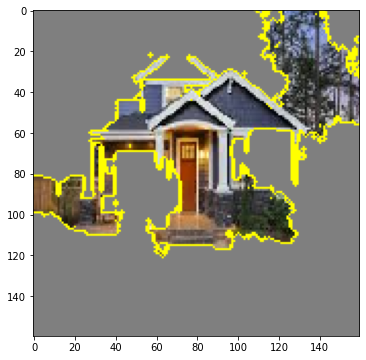

In [23]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 5, hide_rest = True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

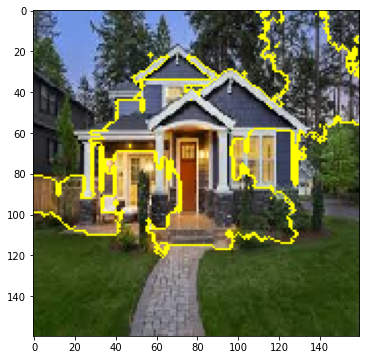

In [24]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 5, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

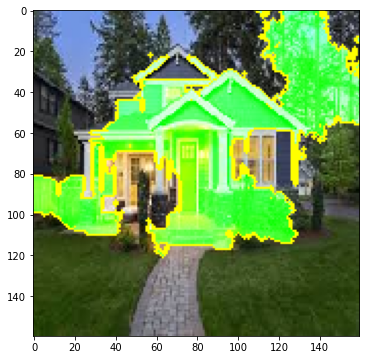

In [26]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 5, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Finding the Features with the Maximum Weights

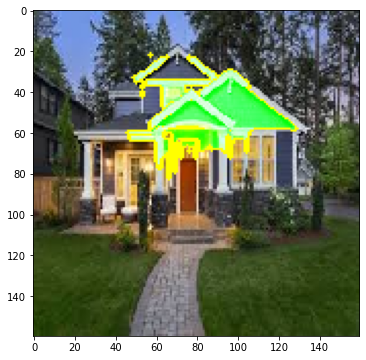

In [29]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 1000, 
                                            hide_rest = False, min_weight = 0.01)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Image 2

In [30]:
images = transform_img_fn("D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/dataset/test_set/fashion/7f54ee7d2a98c9ff4b38abd3fe1d6500.jpg")

In [31]:
preds = mobilenet_model.predict(images)

In [32]:
explainer = lime_image.LimeImageExplainer()

In [33]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], mobilenet_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples=1000)

100% |########################################################################|


Wall time: 17.8 s


### Finding the 3 Most Important Features Detected by the Model

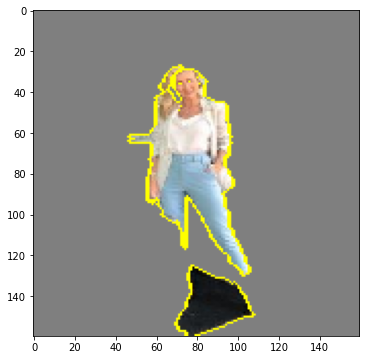

In [36]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 3, hide_rest = True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

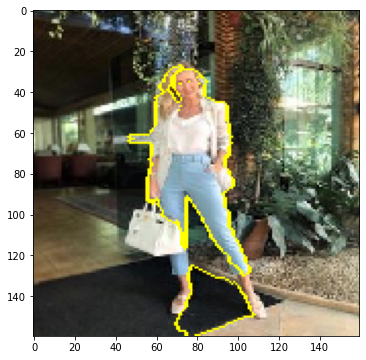

In [38]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 3, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

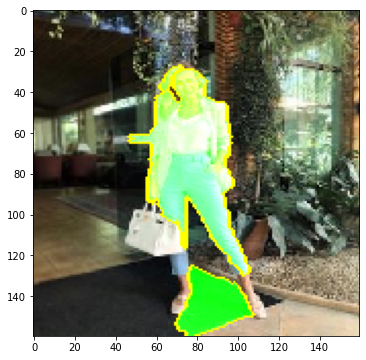

In [39]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 3, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Finding the Features with the Maximum Weights

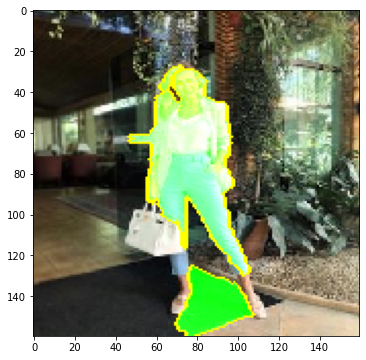

In [41]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 1000, 
                                            hide_rest = False, min_weight = 0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Image 3

In [68]:
images = transform_img_fn("D:/Ryerson University/Courses/DS - 8013 Deep Learning/Project/bin/test_images/art_test.jpg")

In [69]:
preds = mobilenet_model.predict(images)

In [70]:
explainer = lime_image.LimeImageExplainer()

In [71]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], mobilenet_model.predict, top_labels = 5, hide_color = 0, 
                                         num_samples=1000)

100% |########################################################################|


Wall time: 17.4 s


### Finding the 3 Most Important Features Detected by the Model

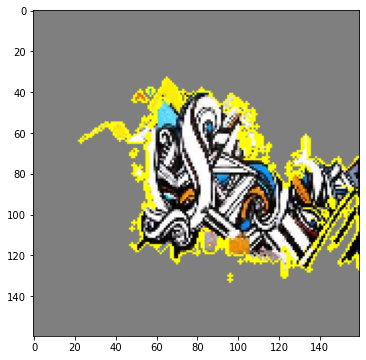

In [72]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 3, hide_rest = True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

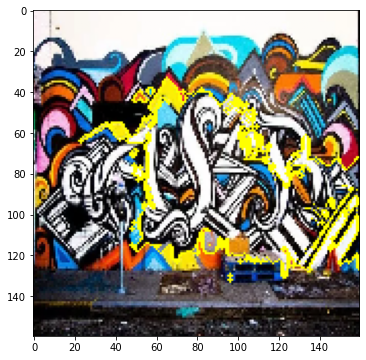

In [73]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = True, num_features = 3, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

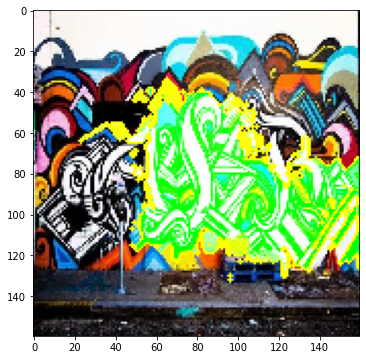

In [74]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 3, hide_rest = False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Finding the Features with the Maximum Weights

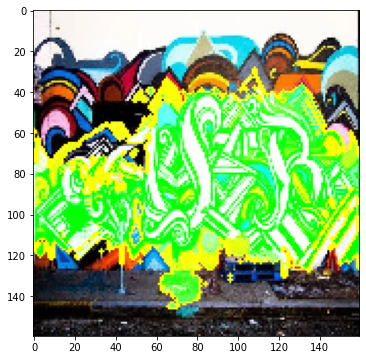

In [77]:
plt.figure(figsize = (12, 6))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only = False, num_features = 1000, 
                                            hide_rest = False, min_weight = 0.05)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))